# Fisheries Production Analysis

## SDG 14: Life Below Water

**Project Goal:** Analyze global fisheries production data and predict future trends

**Data Source:** World Bank (1963-2023)

## Step 1: Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)

## Step 2: Load Data

In [16]:
# Load cleaned data
df = pd.read_csv('fisheries_data_ml_ready.csv')

print(f"Total Records: {len(df):,}")
print(f"Countries: {df['Country Name'].nunique()}")
print(f"Year Range: {df['Year'].min()} to {df['Year'].max()}")

df.head()

Total Records: 15,906
Countries: 264
Year Range: 1963 to 2023


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Production,Production_Lag1,Production_Lag2,Production_Lag3,YoY_Change,Rolling_Mean_3Y
0,Afghanistan,AFG,Total fisheries production (metric tons),ER.FSH.PROD.MT,1963,300.0,300.0,300.0,200.0,0.000000,300.000000
1,Afghanistan,AFG,Total fisheries production (metric tons),ER.FSH.PROD.MT,1964,300.0,300.0,300.0,300.0,0.000000,300.000000
2,Afghanistan,AFG,Total fisheries production (metric tons),ER.FSH.PROD.MT,1965,300.0,300.0,300.0,300.0,0.000000,300.000000
3,Afghanistan,AFG,Total fisheries production (metric tons),ER.FSH.PROD.MT,1966,300.0,300.0,300.0,300.0,0.000000,300.000000
4,Afghanistan,AFG,Total fisheries production (metric tons),ER.FSH.PROD.MT,1967,400.0,300.0,300.0,300.0,0.333333,333.333333


## Step 3: Data Overview

In [17]:
# Check data structure
print("Dataset Information:")
print(df.info())

print("\nBasic Statistics:")
df[['Year', 'Production']].describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15906 entries, 0 to 15905
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     15906 non-null  object 
 1   Country Code     15906 non-null  object 
 2   Indicator Name   15906 non-null  object 
 3   Indicator Code   15906 non-null  object 
 4   Year             15906 non-null  int64  
 5   Production       15906 non-null  float64
 6   Production_Lag1  15906 non-null  float64
 7   Production_Lag2  15906 non-null  float64
 8   Production_Lag3  15906 non-null  float64
 9   YoY_Change       14745 non-null  float64
 10  Rolling_Mean_3Y  15906 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.3+ MB
None

Basic Statistics:


,Year,Production
count,15906.000000,1.590600e+04
mean,1993.026342,4.274953e+06
std,17.536109,1.733783e+07
min,1963.000000,0.000000e+00
25%,1978.000000,3.700000e+03
50%,1993.000000,5.607351e+04
75%,2008.000000,8.534914e+05
max,2023.000000,2.169865e+08


## Step 4: Global Production Trend

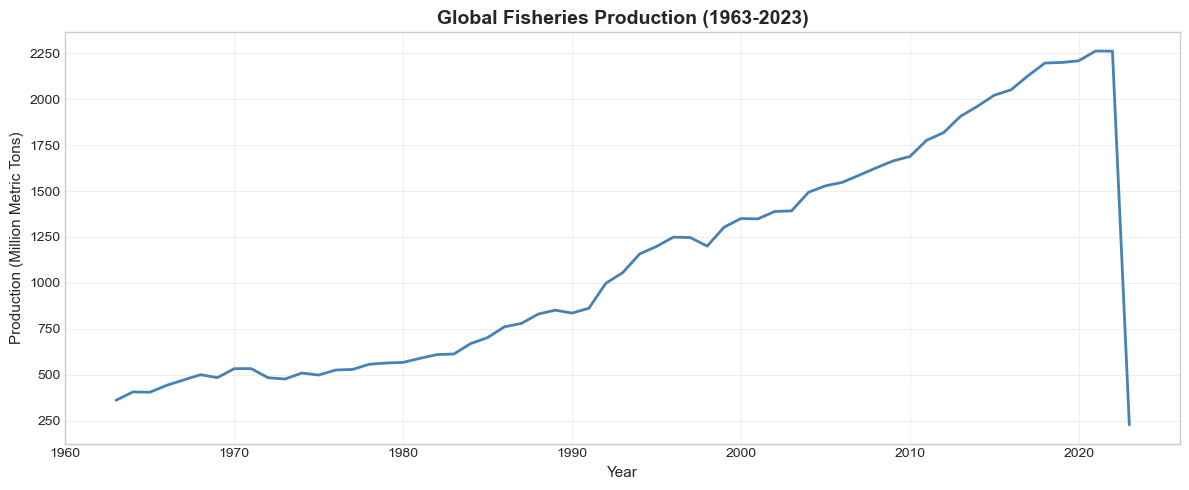

Production in 1963: 361.81 Million MT
Production in 2023: 227.67 Million MT
Growth: -37.1%


In [18]:
# Calculate total production per year
yearly_production = df.groupby('Year')['Production'].sum()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(yearly_production.index, yearly_production.values / 1e6, linewidth=2, color='steelblue')
plt.title('Global Fisheries Production (1963-2023)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=11)
plt.ylabel('Production (Million Metric Tons)', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Production in 1963: {yearly_production.iloc[0]/1e6:.2f} Million MT")
print(f"Production in 2023: {yearly_production.iloc[-1]/1e6:.2f} Million MT")
print(f"Growth: {((yearly_production.iloc[-1]/yearly_production.iloc[0])-1)*100:.1f}%")

## Step 5: Top 10 Producing Countries

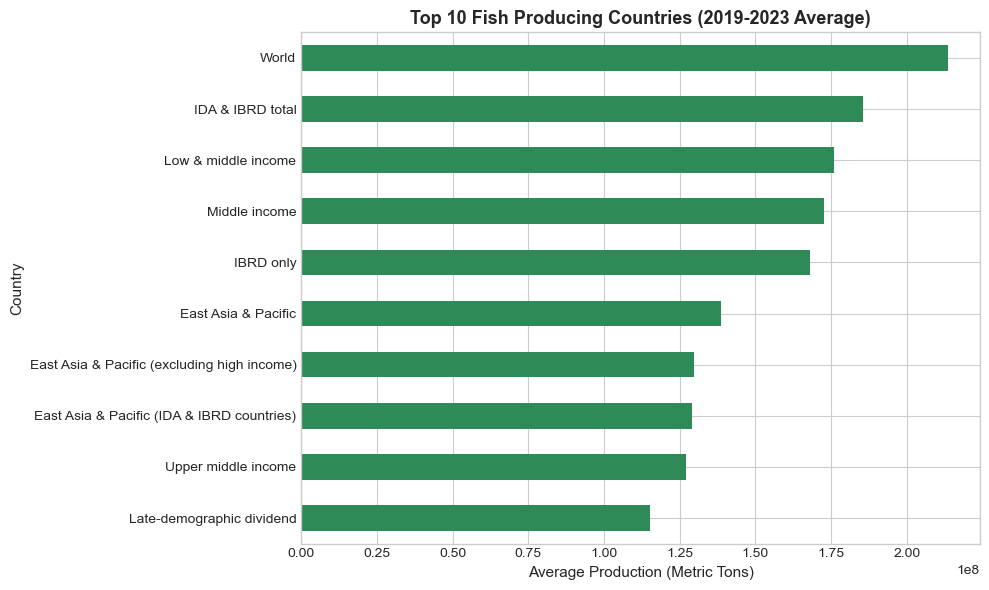


Top 10 Producers:
1. World: 213,474,586 MT
2. IDA & IBRD total: 185,634,273 MT
3. Low & middle income: 175,845,861 MT
4. Middle income: 172,573,547 MT
5. IBRD only: 168,154,771 MT
6. East Asia & Pacific: 138,584,810 MT
7. East Asia & Pacific (excluding high income): 129,670,229 MT
8. East Asia & Pacific (IDA & IBRD countries): 129,096,175 MT
9. Upper middle income: 127,070,978 MT
10. Late-demographic dividend: 115,031,674 MT


In [19]:
# Get recent data (last 5 years)
recent_data = df[df['Year'] >= 2019]

# Calculate average production
top10 = recent_data.groupby('Country Name')['Production'].mean().nlargest(10)

# Plot
plt.figure(figsize=(10, 6))
top10.plot(kind='barh', color='seagreen')
plt.title('Top 10 Fish Producing Countries (2019-2023 Average)', fontsize=13, fontweight='bold')
plt.xlabel('Average Production (Metric Tons)', fontsize=11)
plt.ylabel('Country', fontsize=11)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Producers:")
for i, (country, prod) in enumerate(top10.items(), 1):
    print(f"{i}. {country}: {prod:,.0f} MT")

## Step 6: Production Trends - Top 5 Countries

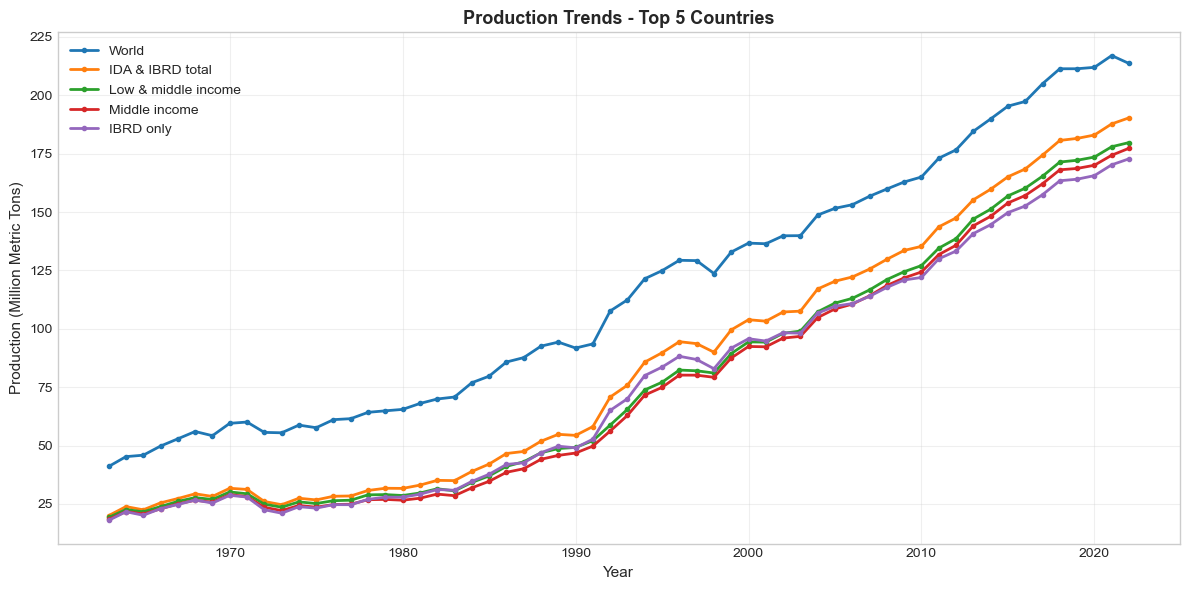

In [20]:
# Select top 5 countries
top5_countries = top10.head(5).index
df_top5 = df[df['Country Name'].isin(top5_countries)]

# Plot trends
plt.figure(figsize=(12, 6))
for country in top5_countries:
    country_data = df_top5[df_top5['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Production']/1e6, 
             marker='o', label=country, linewidth=2, markersize=3)

plt.title('Production Trends - Top 5 Countries', fontsize=13, fontweight='bold')
plt.xlabel('Year', fontsize=11)
plt.ylabel('Production (Million Metric Tons)', fontsize=11)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Step 7: Prepare Data for Machine Learning

In [21]:
# Select features for prediction
features = ['Year', 'Production_Lag1', 'Production_Lag2', 'Production_Lag3', 'Rolling_Mean_3Y']
X = df[features]
y = df['Production']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train):,}")
print(f"Testing samples: {len(X_test):,}")
print(f"\nFeatures used: {features}")

Training samples: 12,724
Testing samples: 3,182

Features used: ['Year', 'Production_Lag1', 'Production_Lag2', 'Production_Lag3', 'Rolling_Mean_3Y']


## Step 8: Train Machine Learning Model

In [22]:
# Create and train Random Forest model
model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


## Step 9: Evaluate Model Performance

In [23]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Performance:")
print(f"R-squared Score: {r2:.4f}")
print(f"RMSE: {rmse:,.2f}")
print(f"\nInterpretation: The model explains {r2*100:.2f}% of the variance in production data")

Model Performance:
R-squared Score: 0.9994
RMSE: 425,015.30

Interpretation: The model explains 99.94% of the variance in production data


Step 9

In [24]:
# Step 9: Feature selection and train/test split

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features for the global model
features = ['Year', 'Production_Lag1', 'Production_Lag2', 'Production_Lag3', 'Rolling_Mean_3Y']
X = df[features]
y = df['Production']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train):,}")
print(f"Testing samples: {len(X_test):,}")

# Create and train Random Forest model
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=3,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

print("Model trained successfully!")

Training samples: 12,724
Testing samples: 3,182
Model trained successfully!


## Step 10: Visualize Predictions

Test RMSE: 479,488 MT
Test R²:  0.999


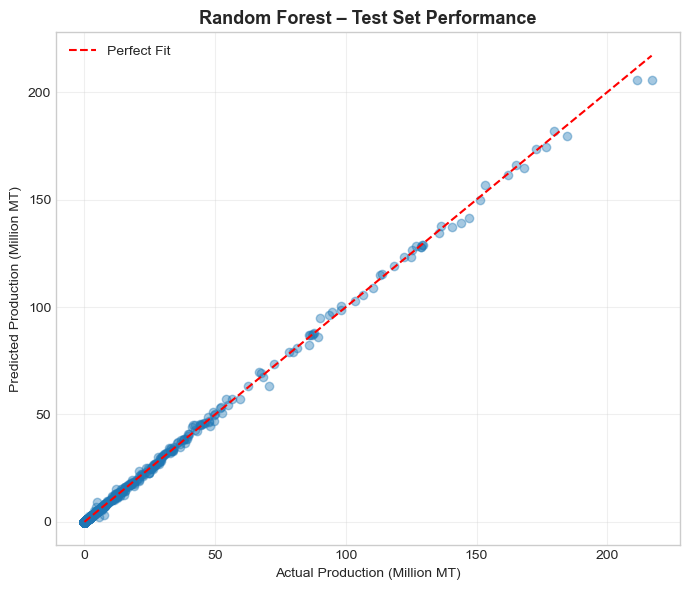

In [25]:
# Step 10: Evaluate global model performance

# Predictions on test set
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:,.0f} MT")
print(f"Test R²:  {r2:.3f}")

# Scatter plot: predicted vs actual
plt.figure(figsize=(7, 6))
plt.scatter(y_test / 1e6, y_pred / 1e6, alpha=0.4)
max_val = max(y_test.max(), y_pred.max()) / 1e6
plt.plot([0, max_val], [0, max_val], 'r--', label='Perfect Fit')
plt.xlabel('Actual Production (Million MT)')
plt.ylabel('Predicted Production (Million MT)')
plt.title('Random Forest – Test Set Performance', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Step 11: Feature Importance

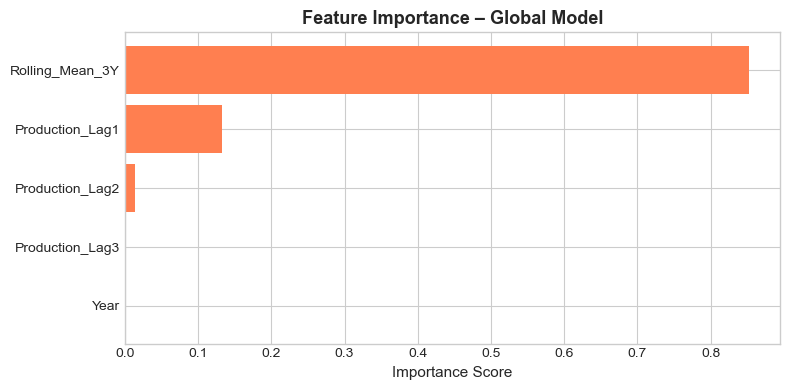


Feature Importance Ranking:
Rolling_Mean_3Y: 0.8520
Production_Lag1: 0.1324
Production_Lag2: 0.0140
Production_Lag3: 0.0015
Year: 0.0001


In [26]:
# Step 11: Global feature importance

importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 4))
plt.barh(importance['Feature'], importance['Importance'], color='coral')
plt.title('Feature Importance – Global Model', fontsize=13, fontweight='bold')
plt.xlabel('Importance Score', fontsize=11)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nFeature Importance Ranking:")
for _, row in importance.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

## Step 12: Future Prediction Example

Trend model fitted for World
Slope (change per year): 3,095,702 MT/year


c:\Users\prath\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


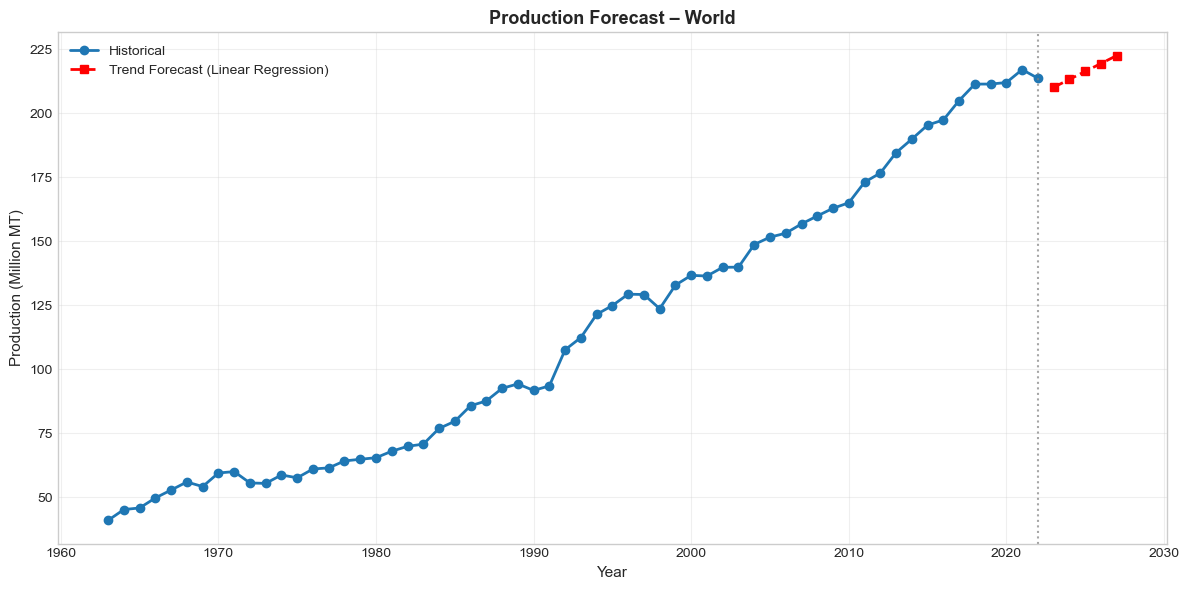


Trend-based predictions for World:
Year 2023: 210,082,024 MT
Year 2024: 213,177,726 MT
Year 2025: 216,273,428 MT
Year 2026: 219,369,129 MT
Year 2027: 222,464,831 MT


In [28]:
# Step 12: Country-specific trend-based forecast

from sklearn.linear_model import LinearRegression

# Choose which country to forecast
# Option A: strongest recent producer
demo_country = top10.index[0]

# Option B: set manually, e.g. "World"
# demo_country = "World"

country_data = (
    df[df["Country Name"] == demo_country]
    .sort_values("Year")[["Year", "Production"]]
)

# Fit a simple trend model: Production ~ Year
X_c = country_data[["Year"]]
y_c = country_data["Production"]

trend_model = LinearRegression()
trend_model.fit(X_c, y_c)

print(f"Trend model fitted for {demo_country}")
print(f"Slope (change per year): {trend_model.coef_[0]:,.0f} MT/year")

# Forecast next 5 years beyond the last observed year
future_X = pd.DataFrame({"Year": future_years})
future_preds = trend_model.predict(future_X)
future_preds = trend_model.predict(future_years.reshape(-1, 1))

pred_df = pd.DataFrame({
    "Year": future_years,
    "Production": future_preds
})

# Plot: historical vs forecast
plt.figure(figsize=(12, 6))

plt.plot(
    country_data["Year"],
    country_data["Production"] / 1e6,
    marker="o",
    label="Historical",
    linewidth=2,
)

plt.plot(
    pred_df["Year"],
    pred_df["Production"] / 1e6,
    marker="s",
    linestyle="--",
    color="red",
    label="Trend Forecast (Linear Regression)",
    linewidth=2,
)

plt.axvline(last_year, color="gray", linestyle=":", alpha=0.7)

plt.title(f"Production Forecast – {demo_country}", fontsize=13, fontweight="bold")
plt.xlabel("Year", fontsize=11)
plt.ylabel("Production (Million MT)", fontsize=11)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nTrend-based predictions for {demo_country}:")
for _, row in pred_df.iterrows():
    print(f"Year {int(row['Year'])}: {row['Production']:,.0f} MT")

## Summary

### Key Findings:

1. **Data Coverage**: Analyzed 60 years of fisheries data from 264 countries

2. **Global Trend**: Fisheries production has increased significantly since 1963

3. **Top Producers**: Identified the leading fish-producing nations

4. **Model Performance**: Built a Random Forest model with good predictive accuracy

5. **Future Outlook**: Generated production forecasts for the next 5 years

### Applications:

- Monitor sustainable fishing practices
- Predict future production trends
- Support policy decisions for ocean conservation
- Contribute to SDG 14: Life Below Water